In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
import matplotlib.pylab as plt

In [3]:
hr = pd.read_csv("/Users/dominicventura/Machine Learning/Neural Network Project/hremployee.csv")

In [4]:
hr = hr.drop(['Over18', 
              'EmployeeCount',
              'EmployeeNumber',
              'StandardHours'
             ], axis = 1)

In [5]:
# Creating dummy variables
from sklearn.preprocessing import LabelEncoder

for column in hr.columns:
    if hr[column].dtype == np.number:
        continue
    hr[column] = LabelEncoder().fit_transform(hr[column])


In [6]:
hr['Age_new'] = hr['Age']
hr = hr.drop('Age', axis = 1)

In [7]:
# Split and train data
hr_predictors = hr.iloc[:, 1:hr.shape[1]].values
hr_response = hr.iloc[:,0].values

In [8]:
feature_names = ['BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age_new']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(hr_predictors, hr_response, test_size = 0.25, random_state=14)

In [10]:
# Transform data into a specific format that XGBoost can handle. 
# That format is called DMatrix. It’s a very simple one-linear to transform a numpy array of data to DMatrix format

D_train = xgb.DMatrix(data=X_train, label=y_train, feature_names=feature_names)
D_test = xgb.DMatrix(data=X_test, label=y_test, feature_names=feature_names)

In [66]:
param = {
    'eta': 0.1, # learning rate (helps prevent overfitting)
    'max_depth': 2,  # maximum depth of the decision trees being trained
    'objective': 'multi:softprob',  # the loss function being used
    'num_class': 2} # the number of classes in the dataset

steps = 100  # The number of training iterations

In [67]:
model = xgb.train(param, D_train, steps)

In [68]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

In [71]:
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("Precision:", metrics.precision_score(y_test, best_preds))
print("Recall:", metrics.recall_score(y_test, best_preds))

Accuracy = 0.8913043478260869
Precision: 0.7083333333333334
Recall: 0.34


In [16]:
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.40 ] ,
     "max_depth"        : [ 2, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], # gamma parameter can also help with controlling overfitting
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] # percentage of features used per tree. High value can lead 
                                                    # to overfitting.
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="accuracy",
                    cv=3)

grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.4],
                         'gamma': [0.0, 0.1, 0

In [17]:
print(grid.best_params_)

{'colsample_bytree': 0.3, 'eta': 0.05, 'gamma': 0.4, 'max_depth': 6, 'min_child_weight': 7}


In [18]:
optimized_boost = grid.best_estimator_
optimized_boost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.05, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [19]:
optimized_boost.score(X_train, y_train)

0.9455535390199638

In [75]:
preds = optimized_boost.predict(X_test)

In [81]:
print("Accuracy:", metrics.accuracy_score(y_test, preds))
print("Precision:", metrics.precision_score(y_test, preds))
print("Recall:", metrics.recall_score(y_test, preds))

Accuracy: 0.8913043478260869
Precision: 0.6785714285714286
Recall: 0.38


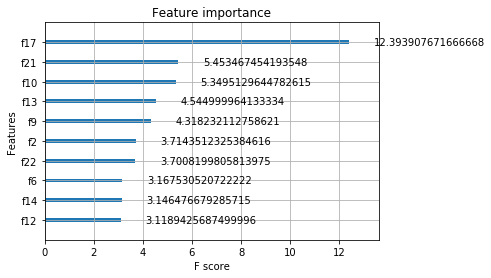

In [86]:
# Gain: the average gain across all splits the feature is used in.
plot_importance(optimized_boost, importance_type = 'gain', max_num_features = 10)                                                                               
plt.show()

f17: OverTime


f21: StockOptionLevel


f10: JobLevel


f13: MaritalStatus


f9: JobInvolvement


f2: Department


f22: TotalWorkingYears


f6: EnvironmentSatisfaction


f14: MonthlyIncome


f12: JobSatisfaction

"F score is a metric that simply sums up how many times each feature is split on. The code for this method is simply adding up the presence of a given feature in all the trees."

https://stackoverflow.com/questions/34218245/how-is-the-feature-score-importance-in-the-xgboost-package-calculated